In [1]:
# CSCI3230 / ESTR3108 2025-26 First Term Assignment 2
# I declare that the assignment here submitted is original except for source
# material explicitly acknowledged, and that the same or closely related material
# has not been previously submitted for another course. I also acknowledge that I
# am aware of University policy and regulations on honesty in academic work, and
# of the disciplinary guidelines and procedures applicable to breaches of such
# policy and regulations, as contained in the following websites.
# University Guideline on Academic Honesty:
# http://www.cuhk.edu.hk/policy/academichonesty/
# Faculty of Engineering Guidelines to Academic Honesty:`
# http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
# Student Name: Wong Kwok Kam
# Student ID : 1155192018

Support Vectors:
  Index 1: x = (3.5, -2.0), y = 1
  Index 8: x = (4.0, -3.5), y = -1

Optimal weight vector: w* = (-0.40, 1.20)
Optimal bias: b* = 4.80

Optimal Hyperplane: f(x) = -0.40x₁ + 1.20x₂ + 4.80

Verification:
Constraint Σ αᵢyᵢ = 0.00 ✓
Point 1: y*f(x) = 1.00 ✓
Point 2: y*f(x) = 4.60 ✓
Point 3: y*f(x) = 7.20 ✓
Point 4: y*f(x) = 1.40 ✓
Point 5: y*f(x) = 3.00 ✓
Point 6: y*f(x) = 4.40 ✓
Point 7: y*f(x) = 1.20 ✓
Point 8: y*f(x) = 1.00 ✓


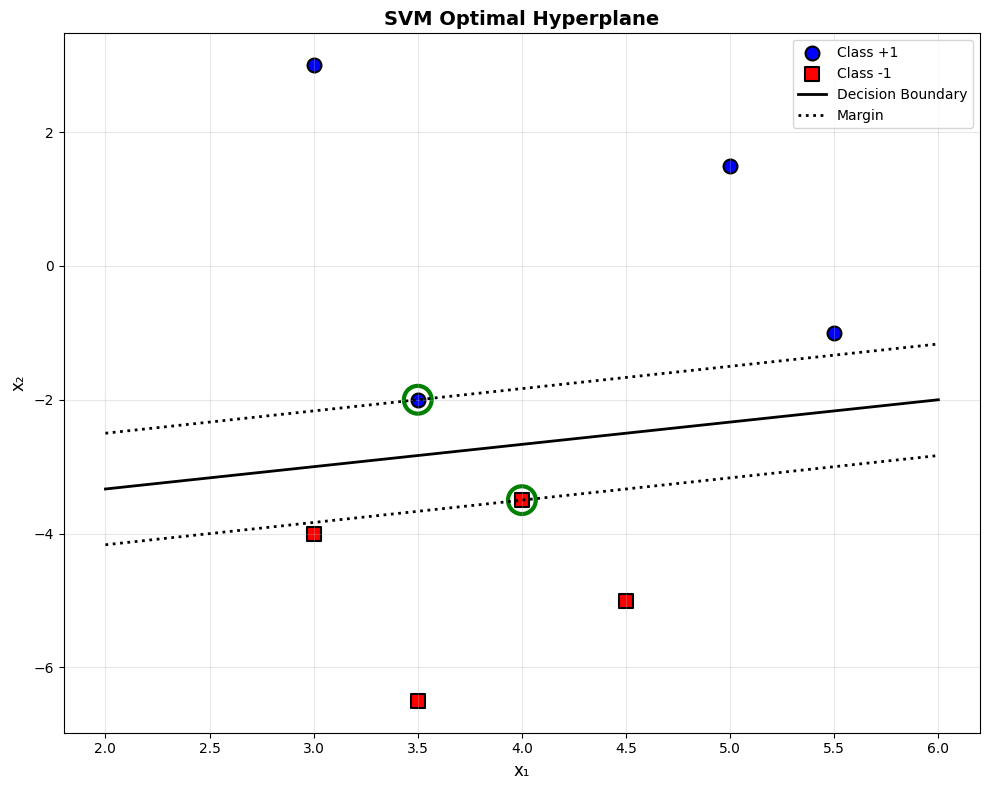

In [2]:
# Q1(a) Optimization Problem

import numpy as np
import matplotlib.pyplot as plt

# Training set
x1_train = np.array([3.5, 5, 3, 5.5, 4.5, 3.5, 3, 4])
x2_train = np.array([-2, 1.5, 3, -1, -5, -6.5, -4, -3.5])
X_train = np.column_stack([x1_train, x2_train])
y_train = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Given optimal alphas
alphas = np.array([0.8, 0, 0, 0, 0, 0, 0, 0.8])

# Identify support vectors (α > 0)
support_vector_indices = np.where(alphas > 0)[0]
print("Support Vectors:")
for idx in support_vector_indices:
    print(
        f"  Index {idx + 1}: x = ({X_train[idx, 0]}, {X_train[idx, 1]}), y = {y_train[idx]}"
    )

# Calculate w* = Σ αᵢ yᵢ xᵢ
w = np.sum(alphas[:, np.newaxis] * y_train[:, np.newaxis] * X_train, axis=0)
print(f"\nOptimal weight vector: w* = ({w[0]:.2f}, {w[1]:.2f})")

# Calculate b* using support vectors
b_values = []
for idx in support_vector_indices:
    b_i = y_train[idx] - np.dot(w, X_train[idx])
    b_values.append(b_i)
b = np.mean(b_values)
print(f"Optimal bias: b* = {b:.2f}")

# Optimal hyperplane
print(f"\nOptimal Hyperplane: f(x) = {w[0]:.2f}x₁ + {w[1]:.2f}x₂ + {b:.2f}")

# Verification
print("\nVerification:")
constraint = np.sum(alphas * y_train)
print(f"Constraint Σ αᵢyᵢ = {constraint:.2f} {"✓" if constraint == 0 else "✗"}")
for i in range(len(X_train)):
    decision = np.dot(w, X_train[i]) + b
    margin = y_train[i] * decision
    print(f"Point {i + 1}: y*f(x) = {margin:.2f} {"✓" if margin >= 0.99 else "✗"}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot training points
positive_mask = y_train == 1
negative_mask = y_train == -1
ax.scatter(
    X_train[positive_mask, 0],
    X_train[positive_mask, 1],
    c="blue",
    marker="o",
    s=100,
    label="Class +1",
    edgecolors="k",
    linewidths=1.5,
)
ax.scatter(
    X_train[negative_mask, 0],
    X_train[negative_mask, 1],
    c="red",
    marker="s",
    s=100,
    label="Class -1",
    edgecolors="k",
    linewidths=1.5,
)

# Highlight support vectors
for idx in support_vector_indices:
    ax.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        s=400,
        facecolors="none",
        edgecolors="green",
        linewidths=3,
    )

# Plot decision boundary and margins
x1_plot = np.linspace(2, 6, 100)
x2_decision = -(w[0] * x1_plot + b) / w[1]
x2_margin_plus = -(w[0] * x1_plot + b - 1) / w[1]
x2_margin_minus = -(w[0] * x1_plot + b + 1) / w[1]

ax.plot(x1_plot, x2_decision, "k-", linewidth=2, label="Decision Boundary")
ax.plot(x1_plot, x2_margin_plus, "k:", linewidth=2, label="Margin")
ax.plot(x1_plot, x2_margin_minus, "k:", linewidth=2)

ax.set_xlabel("x₁", fontsize=12)
ax.set_ylabel("x₂", fontsize=12)
ax.set_title("SVM Optimal Hyperplane", fontsize=14, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
# Q1(b) Test on Test Set

# ============================================
# Given: Optimal Hyperplane Parameters
# ============================================
w = np.array([-0.4, 1.2])  # Weight vector
b = 4.8  # Bias term

# ============================================
# Test Data
# ============================================
x1_test = np.array([5.5, 3.5, 4.5, 2.5, 3.5, 2.5, 4, 5])
x2_test = np.array([0.5, -0.5, 1.5, -1, -4.5, -4, -6, -5])
X_test = np.column_stack([x1_test, x2_test])
y_test = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# ============================================
# Step 1: Compute Decision Function f(x)
# ============================================
def decision_function(X, w, b):
    """
    Compute f(x) = w·x + b for each point

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - f_x: array of decision function values
    """
    return np.dot(X, w) + b


# ============================================
# Step 2: Make Predictions
# ============================================
def predict(f_x):
    """
    Predict class labels using sign(f(x))

    Parameters:
    - f_x: array of decision function values

    Returns:
    - y_pred: predicted labels (+1 or -1)
    """
    return np.where(f_x >= 0, 1, -1)


# ============================================
# Step 3: Compute Distance to Hyperplane (Not required)
# ============================================
def distance_to_hyperplane(X, w, b):
    """
    Compute perpendicular distance from points to hyperplane

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - distances: array of distances
    """
    f_x = decision_function(X, w, b)
    w_norm = np.linalg.norm(w)
    return np.abs(f_x) / w_norm


# ============================================
# Make Predictions
# ============================================
f_values = decision_function(X_test, w, b)
y_pred = predict(f_values)
distances = distance_to_hyperplane(X_test, w, b)

# ============================================
# Evaluate Accuracy
# ============================================
accuracy = np.mean(y_pred == y_test) * 100

# ============================================
# Display Results
# ============================================
print("=" * 70)
print("SVM PREDICTION RESULTS")
print("=" * 70)
print(f"\nHyperplane: f(x) = {w[0]}x₁ + {w[1]}x₂ + {b}")
print(f"||w|| = {np.linalg.norm(w):.4f}")
print(f"Margin width = {2 / np.linalg.norm(w):.4f}")
print("\n" + "-" * 70)
print(
    f"{"Point":<8} {"x₁":<8} {"x₂":<8} {"f(x)":<10} {"ŷ":<6} {"y":<6} {"Correct":<10} {"Distance":<10}"
)
print("-" * 70)

for i in range(len(X_test)):
    correct = "✓" if y_pred[i] == y_test[i] else "✗"
    print(
        f"{i + 1:<8} {X_test[i, 0]:<8.1f} {X_test[i, 1]:<8.1f} "
        f"{f_values[i]:<10.2f} {y_pred[i]:<6d} {y_test[i]:<6d} "
        f"{correct:<10} {distances[i]:<10.2f}"
    )

print("-" * 70)
print(f"\nAccuracy: {accuracy:.1f}% ({np.sum(y_pred == y_test)}/{len(y_test)} correct)")
print("=" * 70)

# ============================================
# Alternative: Vectorized One-liner
# ============================================
# print("\n📌 Quick Prediction (One-liner):")
# y_pred_quick = np.sign(X_test @ w + b).astype(int)
# print(f"Predictions: {y_pred_quick}")


SVM PREDICTION RESULTS

Hyperplane: f(x) = -0.4x₁ + 1.2x₂ + 4.8
||w|| = 1.2649
Margin width = 1.5811

----------------------------------------------------------------------
Point    x₁       x₂       f(x)       ŷ      y      Correct    Distance  
----------------------------------------------------------------------
1        5.5      0.5      3.20       1      1      ✓          2.53      
2        3.5      -0.5     2.80       1      1      ✓          2.21      
3        4.5      1.5      4.80       1      1      ✓          3.79      
4        2.5      -1.0     2.60       1      1      ✓          2.06      
5        3.5      -4.5     -2.00      -1     -1     ✓          1.58      
6        2.5      -4.0     -1.00      -1     -1     ✓          0.79      
7        4.0      -6.0     -4.00      -1     -1     ✓          3.16      
8        5.0      -5.0     -3.20      -1     -1     ✓          2.53      
----------------------------------------------------------------------

Accuracy: 100.0% (

# Q2: SVM with Kernel Functions and Soft-Margin Method

## Introduction

In this section, we implement Support Vector Machine (SVM) models using different kernel functions to handle non-linearly separable data. We employ the soft-margin method to allow for some misclassification, which is more robust for real-world datasets.

### Models Implemented:

1. **Linear SVM with Soft Margin**: Uses a linear kernel with regularization parameter C to control the trade-off between maximizing the margin and minimizing classification errors. Best for linearly separable data.

2. **RBF (Radial Basis Function) SVM with Soft Margin**: Uses a Gaussian kernel that can capture non-linear decision boundaries by mapping data to a higher-dimensional space. Excellent for complex, non-linear patterns.

3. **Polynomial SVM with Soft Margin (Degree 2)**: Uses polynomial kernels to create curved decision boundaries. Degree 2 provides quadratic boundaries that balance complexity and generalization.

### Key Concepts:
- **Kernel Functions**: Transform input data to higher-dimensional space to find non-linear decision boundaries
- **Soft Margin**: Allows some training points to be misclassified to improve generalization
- **Regularization Parameter C**: Controls the balance between margin maximization and error minimization
- **Kernel Parameters**: 
  - **Gamma** (RBF/Polynomial): Controls kernel width - higher values create more complex boundaries
  - **Degree** (Polynomial): Determines polynomial order - higher degrees create more complex curves


In [4]:
# Load and prepare the data
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load training and test data
train_data = pd.read_csv("training.csv", encoding="utf-8-sig")
test_data = pd.read_csv("test.csv", encoding="utf-8-sig")

# Extract features and labels
X_train = train_data[["x1", "x2"]].values
y_train = train_data["label"].values
X_test = test_data[["x1", "x2"]].values
y_test = test_data["label"].values

# Convert labels from {0,1} to {-1,1} for SVM
y_train_svm = 2 * y_train - 1
y_test_svm = 2 * y_test - 1

# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Data loaded and preprocessed:
Training set: 49 samples
Test set: 49 samples


In [5]:
# Model 1: Linear SVM with Soft Margin
# =====================================
# Linear SVM uses a linear kernel to find the optimal hyperplane that separates classes.
# The soft margin approach allows some misclassification to improve generalization.
# Key parameters: C (regularization) controls the trade-off between margin width and classification errors.

print("=" * 60)
print("MODEL 1: LINEAR SVM WITH SOFT MARGIN")
print("=" * 60)

# Train linear SVM
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_linear = linear_svm.predict(X_train_scaled)
y_test_pred_linear = linear_svm.predict(X_test_scaled)

# Calculate accuracies
train_acc_linear = accuracy_score(y_train_svm, y_train_pred_linear)
test_acc_linear = accuracy_score(y_test_svm, y_test_pred_linear)

print(f"Training Accuracy: {train_acc_linear:.4f} ({train_acc_linear*100:.2f}%)")
print(f"Test Accuracy: {test_acc_linear:.4f} ({test_acc_linear*100:.2f}%)")
print(f"Number of support vectors: {linear_svm.n_support_}")
print(f"Support vectors ratio: {linear_svm.n_support_.sum() / len(X_train):.4f}")
print(f"Margin width: {2 / np.linalg.norm(linear_svm.coef_[0]):.4f}")
print(f"Regularization parameter C: {linear_svm.C}")



MODEL 1: LINEAR SVM WITH SOFT MARGIN
Training Accuracy: 0.6122 (61.22%)
Test Accuracy: 0.5102 (51.02%)
Number of support vectors: [23 23]
Support vectors ratio: 0.9388
Margin width: 2.6790
Regularization parameter C: 1.0


In [6]:
# Model 2: RBF SVM with Soft Margin
# ==================================
# RBF (Radial Basis Function) SVM uses a Gaussian kernel to capture non-linear decision boundaries.
# It maps data to infinite-dimensional space, enabling complex separations.
# Key parameters: C (regularization), gamma (controls kernel width - higher = more complex boundaries).

print("=" * 60)
print("MODEL 2: RBF SVM WITH SOFT MARGIN")
print("=" * 60)

# Train RBF SVM
rbf_svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
rbf_svm.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_rbf = rbf_svm.predict(X_train_scaled)
y_test_pred_rbf = rbf_svm.predict(X_test_scaled)

# Calculate accuracies
train_acc_rbf = accuracy_score(y_train_svm, y_train_pred_rbf)
test_acc_rbf = accuracy_score(y_test_svm, y_test_pred_rbf)

print(f"Training Accuracy: {train_acc_rbf:.4f} ({train_acc_rbf*100:.2f}%)")
print(f"Test Accuracy: {test_acc_rbf:.4f} ({test_acc_rbf*100:.2f}%)")
print(f"Number of support vectors: {rbf_svm.n_support_}")
print(f"Support vectors ratio: {rbf_svm.n_support_.sum() / len(X_train):.4f}")
print(f"Gamma parameter: {rbf_svm.gamma}")
print(f"Regularization parameter C: {rbf_svm.C}")


MODEL 2: RBF SVM WITH SOFT MARGIN
Training Accuracy: 0.9388 (93.88%)
Test Accuracy: 0.8980 (89.80%)
Number of support vectors: [12 11]
Support vectors ratio: 0.4694
Gamma parameter: scale
Regularization parameter C: 1.0


In [7]:
# Model 3: Polynomial SVM with Soft Margin (Degree 2)
# ====================================================
# Polynomial SVM uses polynomial kernels to create curved decision boundaries.
# Degree 2 creates quadratic boundaries, balancing complexity and generalization.
# Key parameters: C (regularization), degree (polynomial order), gamma (kernel scaling).

print("=" * 60)
print("MODEL 3: POLYNOMIAL SVM WITH SOFT MARGIN (DEGREE 2)")
print("=" * 60)

# Train Polynomial SVM with degree 2 for better performance
poly_svm_degree2 = SVC(kernel="poly", C=1.0, degree=2, gamma="scale", random_state=42)
poly_svm_degree2.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_poly2 = poly_svm_degree2.predict(X_train_scaled)
y_test_pred_poly2 = poly_svm_degree2.predict(X_test_scaled)

# Calculate accuracies
train_acc_poly2 = accuracy_score(y_train_svm, y_train_pred_poly2)
test_acc_poly2 = accuracy_score(y_test_svm, y_test_pred_poly2)

print(f"Training Accuracy: {train_acc_poly2:.4f} ({train_acc_poly2*100:.2f}%)")
print(f"Test Accuracy: {test_acc_poly2:.4f} ({test_acc_poly2*100:.2f}%)")
print(f"Number of support vectors: {poly_svm_degree2.n_support_}")
print(f"Support vectors ratio: {poly_svm_degree2.n_support_.sum() / len(X_train):.4f}")
print(f"Polynomial degree: {poly_svm_degree2.degree}")
print(f"Gamma parameter: {poly_svm_degree2.gamma}")
print(f"Regularization parameter C: {poly_svm_degree2.C}")


MODEL 3: POLYNOMIAL SVM WITH SOFT MARGIN (DEGREE 2)
Training Accuracy: 0.9388 (93.88%)
Test Accuracy: 0.8571 (85.71%)
Number of support vectors: [11  9]
Support vectors ratio: 0.4082
Polynomial degree: 2
Gamma parameter: scale
Regularization parameter C: 1.0


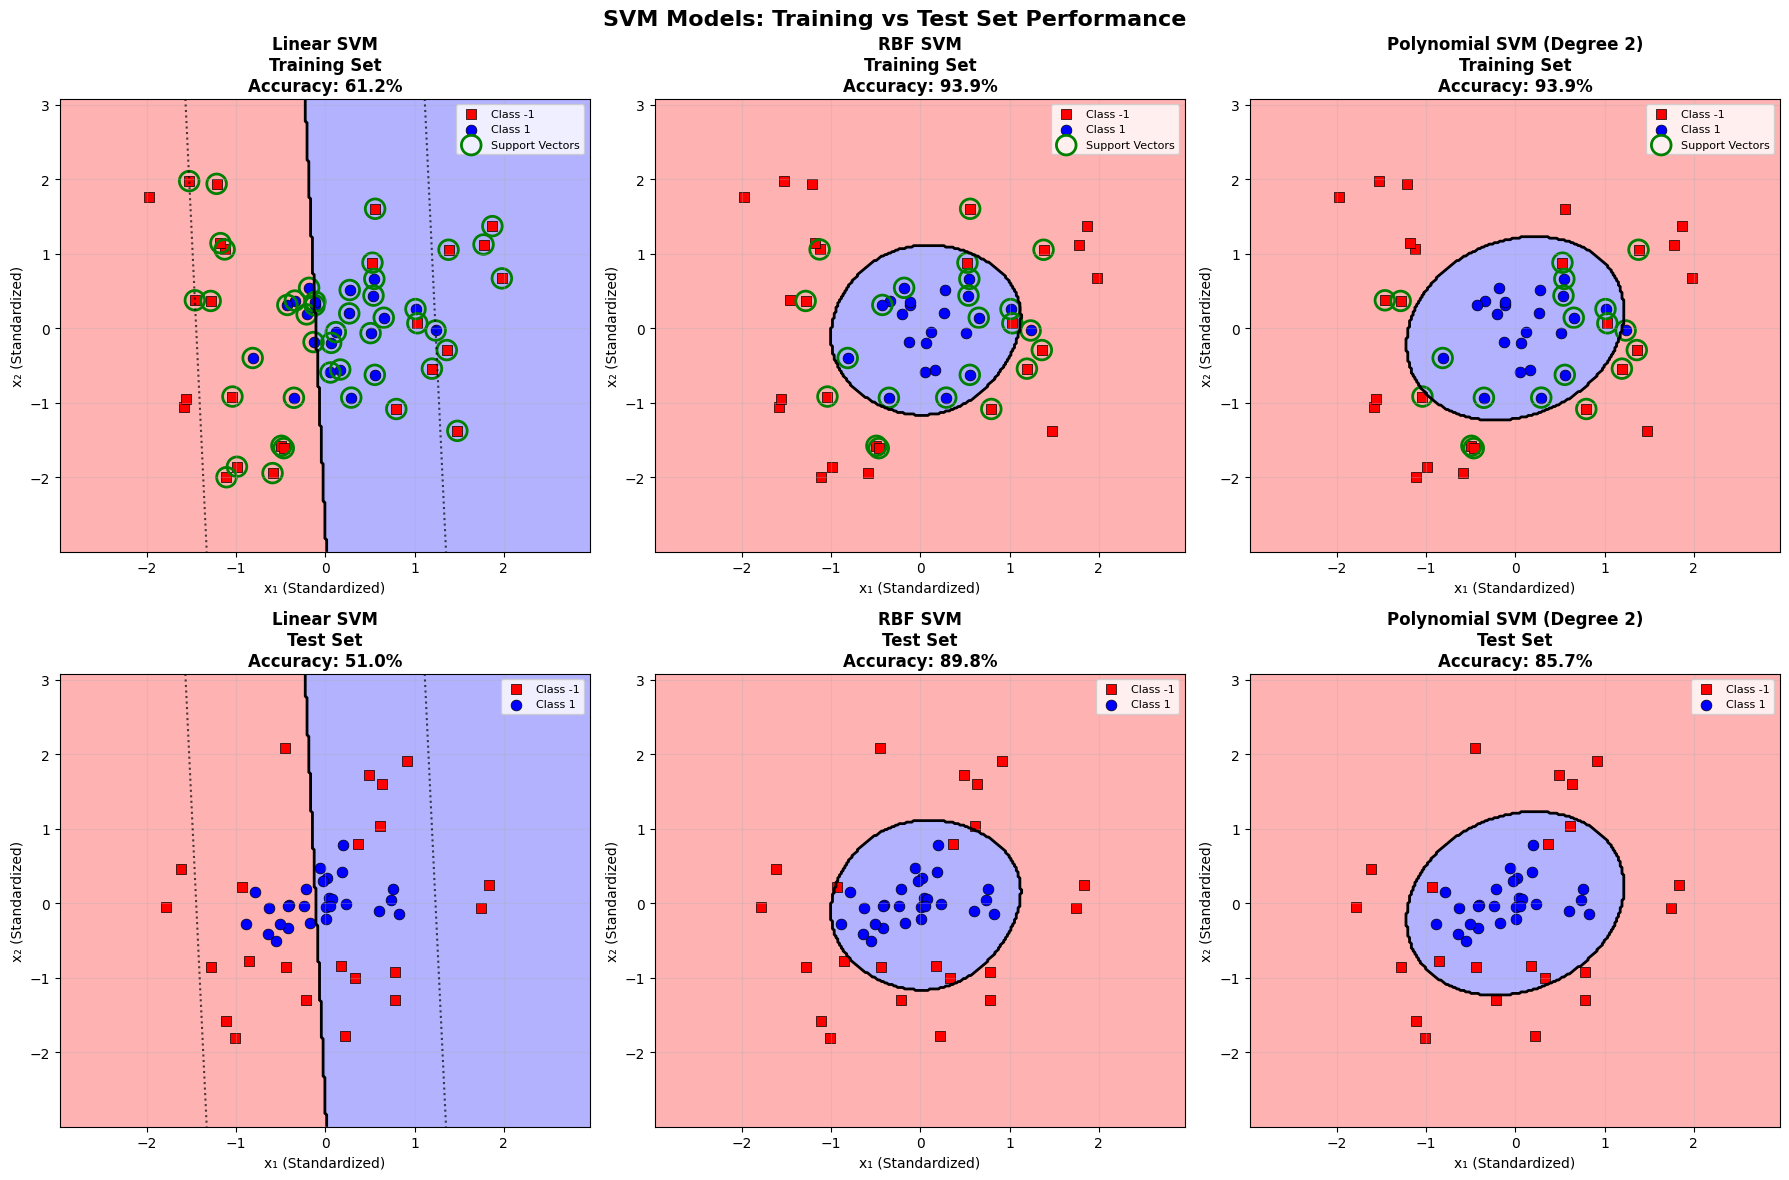

SUMMARY OF ALL MODELS
Model                     Train Acc    Test Acc     Support Vectors Margin Width
--------------------------------------------------------------------------------
Linear SVM                61.2         51.0         46              2.6790      
RBF SVM                   93.9         89.8         23              N/A         
Polynomial SVM (Degree 2) 93.9         85.7         20              N/A         
--------------------------------------------------------------------------------
Total training samples: 49
Total test samples: 49


In [8]:
# Comprehensive Visualization of All 3 SVM Models
# Plot training and test sets for each model with decision boundaries

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create a comprehensive figure with 6 subplots (3 models × 2 datasets)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SVM Models: Training vs Test Set Performance', fontsize=16, fontweight='bold')

# Define models and their predictions
models = [
    (linear_svm, y_train_pred_linear, y_test_pred_linear, "Linear SVM"),
    (rbf_svm, y_train_pred_rbf, y_test_pred_rbf, "RBF SVM"),
    (poly_svm_degree2, y_train_pred_poly2, y_test_pred_poly2, "Polynomial SVM (Degree 2)")
]

# Define datasets
datasets = [
    (X_train_scaled, y_train_svm, "Training Set"),
    (X_test_scaled, y_test_svm, "Test Set")
]

# Create mesh for decision boundary plotting
def create_mesh(X, h=0.02):
    """Create a mesh for plotting decision boundaries"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Create mesh for all data combined
X_combined = np.vstack([X_train_scaled, X_test_scaled])
xx, yy = create_mesh(X_combined)

# Define colors for classes
colors = ['red', 'blue']
cmap = ListedColormap(colors)

# Plot each model and dataset combination
for model_idx, (model, train_pred, test_pred, model_name) in enumerate(models):
    for dataset_idx, (X_data, y_data, dataset_name) in enumerate(datasets):
        ax = axes[dataset_idx, model_idx]

        # Get predictions for current dataset
        if dataset_idx == 0:  # Training set
            y_pred = train_pred
        else:  # Test set
            y_pred = test_pred

        # Calculate accuracy
        accuracy = accuracy_score(y_data, y_pred) * 100

        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

        # Plot decision boundary as solid line
        ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

        # Plot margin boundaries as dotted lines (for linear SVM only)
        if hasattr(model, 'coef_') and model.coef_ is not None:
            # For linear SVM, we can calculate margin boundaries
            w = model.coef_[0]
            b = model.intercept_[0]

            # Create margin boundaries
            margin_levels = [-1, 1]  # Margin boundaries
            for margin_level in margin_levels:
                # Calculate decision function values for margin
                Z_margin = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b - margin_level
                Z_margin = Z_margin.reshape(xx.shape)
                ax.contour(xx, yy, Z_margin, levels=[0], colors='black',
                          linewidths=1.5, linestyles=':', alpha=0.7)

        # Plot data points
        for class_val, color, marker in [(-1, 'red', 's'), (1, 'blue', 'o')]:
            mask = y_data == class_val
            ax.scatter(X_data[mask, 0], X_data[mask, 1],
                      c=color, marker=marker, s=60,
                      edgecolors='black', linewidth=0.5,
                      label=f'Class {class_val}')

        # Highlight support vectors only for training set plots
        if hasattr(model, 'support_vectors_') and dataset_idx == 0:  # Only for training set
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=200, facecolors='none', edgecolors='green',
                      linewidth=2, label='Support Vectors')

        # Set title and labels
        ax.set_title(f'{model_name}\n{dataset_name}\nAccuracy: {accuracy:.1f}%',
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('x₁ (Standardized)', fontsize=10)
        ax.set_ylabel('x₂ (Standardized)', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 80)
print("SUMMARY OF ALL MODELS")
print("=" * 80)

print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'Support Vectors':<15} {'Margin Width':<12}")
print("-" * 80)

for model, train_pred, test_pred, model_name in models:
    train_acc = accuracy_score(y_train_svm, train_pred) * 100
    test_acc = accuracy_score(y_test_svm, test_pred) * 100
    n_support = model.n_support_.sum()

    # Calculate margin width (only for linear SVM)
    if hasattr(model, 'coef_') and model.coef_ is not None:
        margin_width = 2 / np.linalg.norm(model.coef_[0])
        margin_str = f"{margin_width:.4f}"
    else:
        margin_str = "N/A"

    print(f"{model_name:<25} {train_acc:<12.1f} {test_acc:<12.1f} {n_support:<15} {margin_str:<12}")

print("-" * 80)
print(f"Total training samples: {len(X_train)}")
print(f"Total test samples: {len(X_test)}")
print("=" * 80)

# The RBF and Polynomial SVM models will only show the decision boundary as solid lines
# since their margin boundaries are more complex to visualize in the original feature space.


K-MEANS CLUSTERING - FIRST ITERATION

📍 INITIAL CLUSTER CENTERS:
  C1: (7, 4)
  C2: (3, 6)
  C3: (7, 9)

📊 CLUSTER ASSIGNMENTS:
  C1: ['d', 'e', 'h', 'k', 'o']
  C2: ['a', 'b', 'c', 'f', 'g', 'm']
  C3: ['i', 'j', 'l', 'n']

✨ UPDATED CLUSTER CENTERS (After First Iteration):
  C1: (np.float64(6.2), np.float64(4.0))
  C2: (np.float64(2.67), np.float64(3.83))
  C3: (np.float64(6.75), np.float64(8.5))


📋 DETAILED DISTANCE TABLE:
Point Coordinates  Dist_to_C1  Dist_to_C2  Dist_to_C3 Assigned
    a      (1, 2)        6.32        4.47        9.22       C2
    b      (2, 3)        5.10        3.16        7.81       C2
    c      (2, 4)        5.00        2.24        7.07       C2
    d      (6, 5)        1.41        3.16        4.12       C1
    e      (3, 1)        5.00        5.00        8.94       C1
    f      (3, 3)        4.12        3.00        7.21       C2
    g      (4, 4)        3.00        2.24        5.83       C2
    h      (7, 6)        2.00        4.00        3.00       C1
  

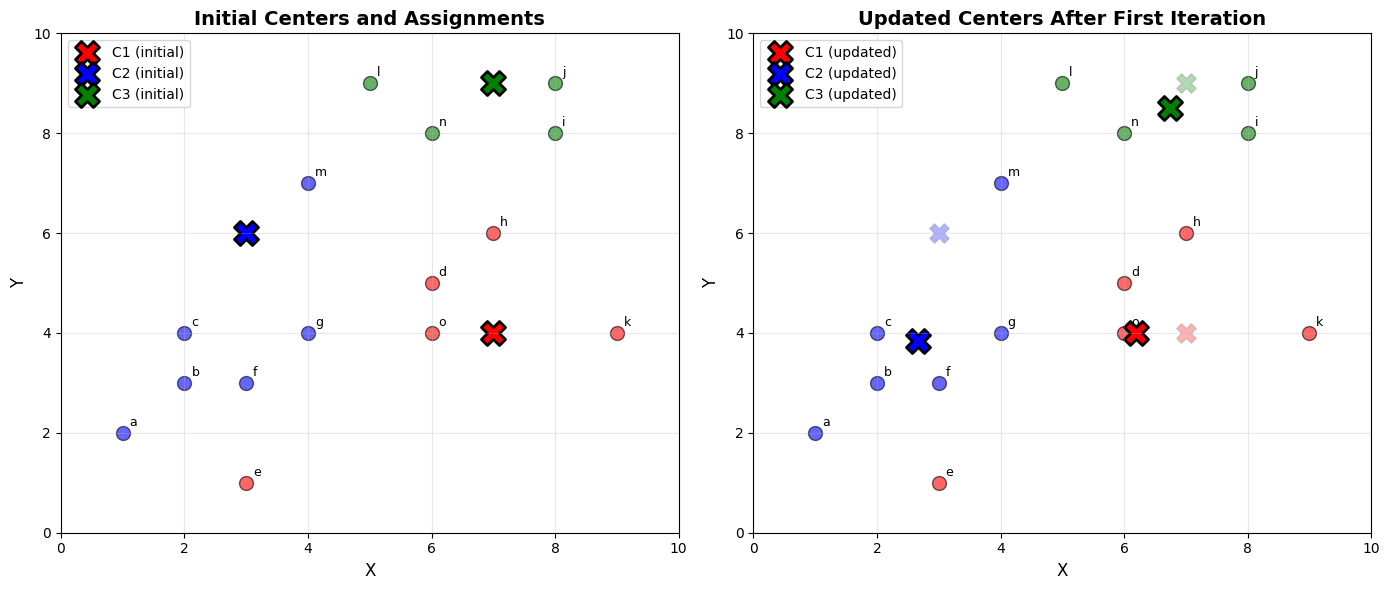

In [9]:
# Q2(a) K-Means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define data points
points = {
    "a": (1, 2),
    "b": (2, 3),
    "c": (2, 4),
    "d": (6, 5),
    "e": (3, 1),
    "f": (3, 3),
    "g": (4, 4),
    "h": (7, 6),
    "i": (8, 8),
    "j": (8, 9),
    "k": (9, 4),
    "l": (5, 9),
    "m": (4, 7),
    "n": (6, 8),
    "o": (6, 4),
}

# Step 2: Define initial cluster centers
centers = {
    'C1': (7, 4),
    'C2': (3, 6),
    'C3': (7, 9)
}

# Step 3: Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Step 4: Assign each point to nearest cluster
assignments = {}
for point_name, point_coord in points.items():
    distances = {}
    for center_name, center_coord in centers.items():
        distances[center_name] = euclidean_distance(point_coord, center_coord)

    # Assign to cluster with minimum distance
    assigned_cluster = min(distances, key=distances.get)
    assignments[point_name] = assigned_cluster

# Step 5: Calculate new cluster centers
new_centers = {}
for cluster_name in centers.keys():
    # Get all points assigned to this cluster
    cluster_points = [points[point_name] for point_name, assigned_cluster
                      in assignments.items() if assigned_cluster == cluster_name]

    if cluster_points:
        # Calculate mean of x and y coordinates
        x_mean = np.mean([p[0] for p in cluster_points])
        y_mean = np.mean([p[1] for p in cluster_points])
        new_centers[cluster_name] = (round(x_mean, 2), round(y_mean, 2))
    else:
        # If no points assigned, keep the old center
        new_centers[cluster_name] = centers[cluster_name]

# Step 6: Display results
print("=" * 60)
print("K-MEANS CLUSTERING - FIRST ITERATION")
print("=" * 60)

print("\n📍 INITIAL CLUSTER CENTERS:")
for center_name, center_coord in centers.items():
    print(f"  {center_name}: {center_coord}")

print("\n📊 CLUSTER ASSIGNMENTS:")
for cluster_name in sorted(centers.keys()):
    assigned_points = [point_name for point_name, assigned_cluster
                       in assignments.items() if assigned_cluster == cluster_name]
    print(f"  {cluster_name}: {sorted(assigned_points)}")

print("\n✨ UPDATED CLUSTER CENTERS (After First Iteration):")
for center_name, center_coord in new_centers.items():
    print(f"  {center_name}: {center_coord}")

print("\n" + "=" * 60)

# Step 7: Create detailed assignment table
results = []
for point_name, point_coord in sorted(points.items()):
    distances = {}
    for center_name, center_coord in centers.items():
        dist = euclidean_distance(point_coord, center_coord)
        distances[center_name] = round(dist, 2)

    assigned = assignments[point_name]
    results.append({
        'Point': point_name,
        'Coordinates': point_coord,
        'Dist_to_C1': distances['C1'],
        'Dist_to_C2': distances['C2'],
        'Dist_to_C3': distances['C3'],
        'Assigned': assigned
    })

df = pd.DataFrame(results)
print("\n📋 DETAILED DISTANCE TABLE:")
print(df.to_string(index=False))

# Step 8: Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors = {'C1': 'red', 'C2': 'blue', 'C3': 'green'}

# Plot 1: Initial centers and assignments
for point_name, point_coord in points.items():
    cluster = assignments[point_name]
    ax1.scatter(point_coord[0], point_coord[1], c=colors[cluster],
                s=100, alpha=0.6, edgecolors='black')
    ax1.annotate(point_name, (point_coord[0], point_coord[1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

for center_name, center_coord in centers.items():
    ax1.scatter(center_coord[0], center_coord[1], c=colors[center_name],
                s=300, marker='X', edgecolors='black', linewidths=2,
                label=f'{center_name} (initial)')

ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('Initial Centers and Assignments', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Plot 2: Updated centers
for point_name, point_coord in points.items():
    cluster = assignments[point_name]
    ax2.scatter(point_coord[0], point_coord[1], c=colors[cluster],
                s=100, alpha=0.6, edgecolors='black')
    ax2.annotate(point_name, (point_coord[0], point_coord[1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# Plot old centers (faded)
for center_name, center_coord in centers.items():
    ax2.scatter(center_coord[0], center_coord[1], c=colors[center_name],
                s=200, marker='X', alpha=0.3, edgecolors='gray', linewidths=1)

# Plot new centers
for center_name, center_coord in new_centers.items():
    ax2.scatter(center_coord[0], center_coord[1], c=colors[center_name],
                s=300, marker='X', edgecolors='black', linewidths=2,
                label=f'{center_name} (updated)')

ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Updated Centers After First Iteration', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)

plt.tight_layout()
plt.show()


In [10]:
# Q2(b) DBSCAN

from sklearn.cluster import DBSCAN

# ============================================
# Part 1: DBSCAN on the same data points from manual implementation
# ============================================

print("=" * 80)
print("DBSCAN CLUSTERING USING SKLEARN")
print("=" * 80)

# Define the data points
points = {
    "a": (1, 2),
    "b": (2, 3),
    "c": (2, 4),
    "d": (6, 5),
    "e": (3, 1),
    "f": (3, 3),
    "g": (4, 4),
    "h": (7, 6),
    "i": (8, 8),
    "j": (8, 9),
    "k": (9, 4),
    "l": (5, 9),
    "m": (4, 7),
    "n": (6, 8),
    "o": (6, 4),
}

# Convert to numpy array for sklearn
point_names = list(points.keys())
point_coords = np.array(list(points.values()))

# DBSCAN parameters (same as manual implementation)
eps = 2.0
min_samples = 3

print(f"Parameters: ε = {eps}, min_samples = {min_samples}")
print(f"Number of data points: {len(point_coords)}")
print("-" * 80)

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(point_coords)

# Analyze results
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Number of core points: {len(dbscan.core_sample_indices_)}")
print("-" * 80)

# Create detailed results table
results = []
for i, (name, coord) in enumerate(points.items()):
    cluster_id = cluster_labels[i]
    cluster_name = f"Cluster {cluster_id + 1}" if cluster_id >= 0 else "Noise"
    is_core = i in dbscan.core_sample_indices_
    point_type = "Core" if is_core else "Border" if cluster_id >= 0 else "Noise"

    results.append(
        {
            "Point": name,
            "Coordinates": coord,
            "Cluster_ID": cluster_id,
            "Cluster": cluster_name,
            "Type": point_type,
            "Is_Core": is_core,
        }
    )

df_results = pd.DataFrame(results)
print("📊 CLUSTERING RESULTS:")
print(df_results.to_string(index=False))
print("-" * 80)

# Show clusters
print("🔍 CLUSTER COMPOSITION:")
for cluster_id in sorted(set(cluster_labels)):
    if cluster_id == -1:
        noise_points = [
            point_names[i]
            for i, label in enumerate(cluster_labels)
            if label == cluster_id
        ]
        print(f"Noise: {sorted(noise_points)}")
    else:
        cluster_points = [
            point_names[i]
            for i, label in enumerate(cluster_labels)
            if label == cluster_id
        ]
        print(f"Cluster {cluster_id + 1}: {sorted(cluster_points)}")

print("=" * 80)


DBSCAN CLUSTERING USING SKLEARN
Parameters: ε = 2.0, min_samples = 3
Number of data points: 15
--------------------------------------------------------------------------------
Number of clusters found: 2
Number of noise points: 2
Number of core points: 8
--------------------------------------------------------------------------------
📊 CLUSTERING RESULTS:
Point Coordinates  Cluster_ID   Cluster   Type  Is_Core
    a      (1, 2)           0 Cluster 1 Border    False
    b      (2, 3)           0 Cluster 1   Core     True
    c      (2, 4)           0 Cluster 1   Core     True
    d      (6, 5)           0 Cluster 1   Core     True
    e      (3, 1)           0 Cluster 1 Border    False
    f      (3, 3)           0 Cluster 1   Core     True
    g      (4, 4)           0 Cluster 1   Core     True
    h      (7, 6)           0 Cluster 1 Border    False
    i      (8, 8)           1 Cluster 2   Core     True
    j      (8, 9)           1 Cluster 2 Border    False
    k      (9, 4)         

In [11]:
# Print all Core Points and Border Points
print("=" * 80)
print("CORE POINTS AND BORDER POINTS SUMMARY")
print("=" * 80)

# Get core points
core_points = []
border_points = []
noise_points = []

for i, (name, coord) in enumerate(points.items()):
    cluster_id = cluster_labels[i]
    is_core = i in dbscan.core_sample_indices_

    if cluster_id == -1:  # Noise point
        noise_points.append((name, coord))
    elif is_core:  # Core point
        core_points.append((name, coord, cluster_id))
    else:  # Border point
        border_points.append((name, coord, cluster_id))

print(f"📊 TOTAL SUMMARY:")
print(f"   Core Points: {len(core_points)}")
print(f"   Border Points: {len(border_points)}")
print(f"   Noise Points: {len(noise_points)}")
print(f"   Total Points: {len(core_points) + len(border_points) + len(noise_points)}")
print()

print("🔴 CORE POINTS:")
print("-" * 50)
for name, coord, cluster_id in core_points:
    print(f"   Point {name}: {coord} (Cluster {cluster_id + 1})")

print()
print("🔵 BORDER POINTS:")
print("-" * 50)
for name, coord, cluster_id in border_points:
    print(f"   Point {name}: {coord} (Cluster {cluster_id + 1})")

print()
print("⚫ NOISE POINTS:")
print("-" * 50)
for name, coord in noise_points:
    print(f"   Point {name}: {coord}")

print()
print("📋 DETAILED BREAKDOWN BY CLUSTER:")
print("-" * 50)

# Group by cluster
clusters = {}
for name, coord, cluster_id in core_points + border_points:
    if cluster_id not in clusters:
        clusters[cluster_id] = {'core': [], 'border': []}

    is_core = (name, coord, cluster_id) in core_points
    if is_core:
        clusters[cluster_id]['core'].append((name, coord))
    else:
        clusters[cluster_id]['border'].append((name, coord))

for cluster_id in sorted(clusters.keys()):
    print(f"Cluster {cluster_id + 1}:")
    print(f"   Core Points: {[name for name, coord in clusters[cluster_id]['core']]}")
    print(f"   Border Points: {[name for name, coord in clusters[cluster_id]['border']]}")
    print()

print("=" * 80)


CORE POINTS AND BORDER POINTS SUMMARY
📊 TOTAL SUMMARY:
   Core Points: 8
   Border Points: 5
   Noise Points: 2
   Total Points: 15

🔴 CORE POINTS:
--------------------------------------------------
   Point b: (2, 3) (Cluster 1)
   Point c: (2, 4) (Cluster 1)
   Point d: (6, 5) (Cluster 1)
   Point f: (3, 3) (Cluster 1)
   Point g: (4, 4) (Cluster 1)
   Point i: (8, 8) (Cluster 2)
   Point n: (6, 8) (Cluster 2)
   Point o: (6, 4) (Cluster 1)

🔵 BORDER POINTS:
--------------------------------------------------
   Point a: (1, 2) (Cluster 1)
   Point e: (3, 1) (Cluster 1)
   Point h: (7, 6) (Cluster 1)
   Point j: (8, 9) (Cluster 2)
   Point l: (5, 9) (Cluster 2)

⚫ NOISE POINTS:
--------------------------------------------------
   Point k: (9, 4)
   Point m: (4, 7)

📋 DETAILED BREAKDOWN BY CLUSTER:
--------------------------------------------------
Cluster 1:
   Core Points: ['b', 'c', 'd', 'f', 'g', 'o']
   Border Points: ['a', 'e', 'h']

Cluster 2:
   Core Points: ['i', 'n']
   Bord

/tmp/ipykernel_250913/145074839.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(coord[0], coord[1], c=color, marker=marker, s=size,


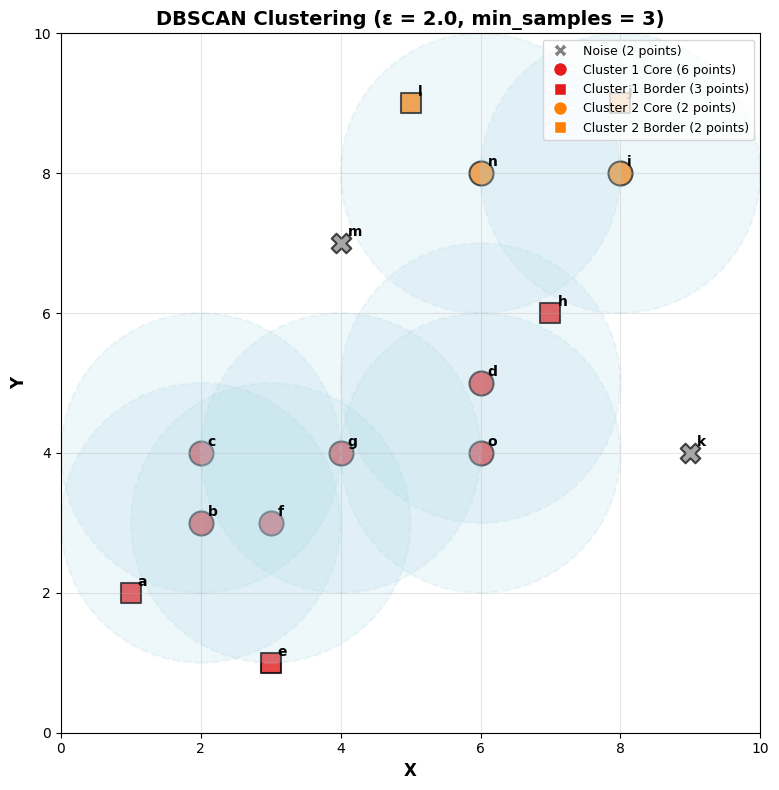

In [12]:
# Visualization of DBSCAN results
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Plot DBSCAN clustering results
colors = plt.cm.Set1(np.linspace(0, 1, n_clusters + 1))
noise_color = 'gray'

for i, (name, coord) in enumerate(points.items()):
    cluster_id = cluster_labels[i]
    is_core = i in dbscan.core_sample_indices_

    if cluster_id == -1:  # Noise point
        color = noise_color
        marker = 'X'
        size = 200
        alpha = 0.7
    else:  # Cluster point
        color = colors[cluster_id]
        marker = 'o' if is_core else 's'
        size = 300 if is_core else 200
        alpha = 0.8

    ax1.scatter(coord[0], coord[1], c=color, marker=marker, s=size,
                alpha=alpha, edgecolors='black', linewidths=1.5)
    ax1.annotate(name, (coord[0], coord[1]), xytext=(5, 5),
                textcoords='offset points', fontsize=10, fontweight='bold')

# Draw epsilon circles around core points
for i in dbscan.core_sample_indices_:
    coord = point_coords[i]
    circle = plt.Circle(coord, eps, color='lightblue', alpha=0.2,
                       linestyle='--', linewidth=1.5, fill=True)
    ax1.add_patch(circle)

ax1.set_xlabel('X', fontsize=12, fontweight='bold')
ax1.set_ylabel('Y', fontsize=12, fontweight='bold')
ax1.set_title(f'DBSCAN Clustering (ε = {eps}, min_samples = {min_samples})',
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_aspect('equal')

# Create legend
legend_elements = []
for cluster_id in sorted(set(cluster_labels)):
    if cluster_id == -1:
        legend_elements.append(plt.Line2D([0], [0], marker='X', color='w',
                                         markerfacecolor=noise_color, markersize=10,
                                         label=f'Noise ({n_noise} points)'))
    else:
        cluster_points = [point_names[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
        core_points = [point_names[i] for i in dbscan.core_sample_indices_ if cluster_labels[i] == cluster_id]
        border_points = [p for p in cluster_points if p not in core_points]

        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                         markerfacecolor=colors[cluster_id], markersize=10,
                                         label=f'Cluster {cluster_id + 1} Core ({len(core_points)} points)'))
        if border_points:
            legend_elements.append(plt.Line2D([0], [0], marker='s', color='w',
                                             markerfacecolor=colors[cluster_id], markersize=8,
                                             label=f'Cluster {cluster_id + 1} Border ({len(border_points)} points)'))

ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()



INITIAL DISTANCE MATRIX

Distance Matrix:
               A       B       C       D       E
A           0.00                                
B           8.00    0.00                        
C           6.00    7.00    0.00                
D           2.00    3.00    9.00    0.00        
E           1.00    6.00    5.00    4.00    0.00

HIERARCHICAL CLUSTERING WITH GROUP AVERAGE DISTANCE

STEP 1

Merging: A and E
Distance: 1.00

Distance Matrix:
           {A,E}       B       C       D
{A,E}       0.00                        
B           7.00    0.00                
C           5.50    7.00    0.00        
D           3.00    3.00    9.00    0.00

STEP 2

Merging: {A,E} and D
Distance: 3.00

Distance Matrix:
         {A,D,E}       B       C
{A,D,E}     0.00                
B           5.67    0.00        
C           6.67    7.00    0.00

STEP 3

Merging: {A,D,E} and B
Distance: 5.67

Distance Matrix:
        {A,B,D,E}       C
{A,B,D,E}    0.00        
C           6.75    0.00

STEP 4



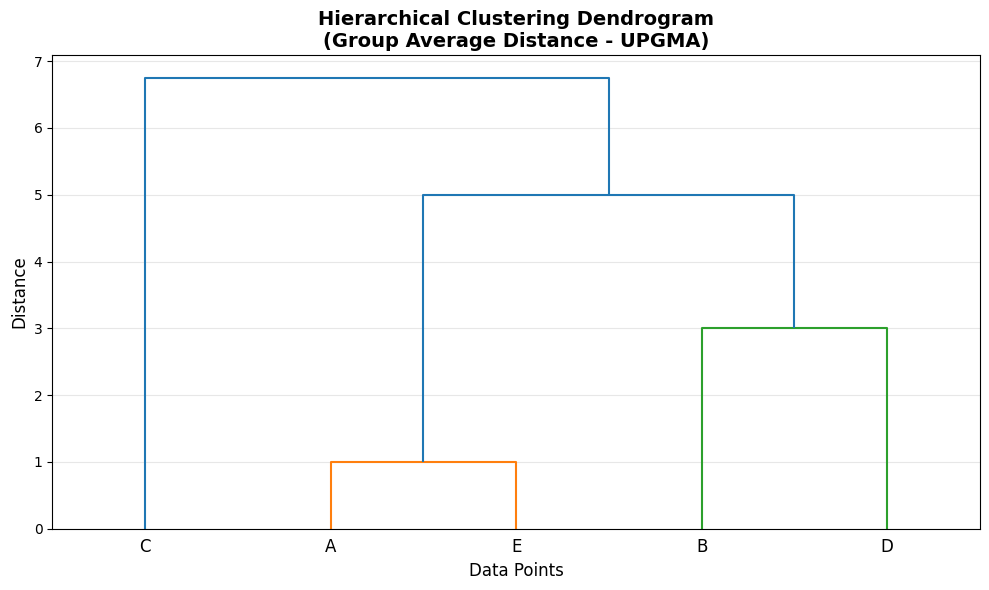

In [ ]:
# Q4 Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


def print_distance_matrix(matrix, labels):
    """Print distance matrix in a formatted way"""
    n = len(labels)
    print("\n" + "=" * 60)
    print("Distance Matrix:")
    print("=" * 60)

    # Print header
    print(f"{'':8}", end="")
    for label in labels:
        print(f"{label:>8}", end="")
    print()

    # Print rows
    for i, label in enumerate(labels):
        print(f"{label:8}", end="")
        for j in range(len(labels)):
            if j <= i:
                print(f"{matrix[i][j]:8.2f}", end="")
            else:
                print(f"{'':8}", end="")
        print()
    print("=" * 60)


def manual_hierarchical_clustering(distance_matrix, labels):
    """
    Perform hierarchical clustering with group average distance manually
    """
    n = len(labels)
    clusters = [[i] for i in range(n)]  # Each point starts as its own cluster
    cluster_labels = labels.copy()

    # Create a copy of the distance matrix
    dist_matrix = distance_matrix.copy()

    merge_history = []
    step = 0

    print("\n" + "=" * 80)
    print("HIERARCHICAL CLUSTERING WITH GROUP AVERAGE DISTANCE")
    print("=" * 80)

    while len(clusters) > 1:
        step += 1
        print(f"\n{'=' * 80}")
        print(f"STEP {step}")
        print(f"{'=' * 80}")

        # Find minimum distance
        min_dist = float("inf")
        merge_i, merge_j = -1, -1

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i][j] < min_dist:
                    min_dist = dist_matrix[i][j]
                    merge_i, merge_j = i, j

        # Print merge information
        print(f"\nMerging: {cluster_labels[merge_i]} and {cluster_labels[merge_j]}")
        print(f"Distance: {min_dist:.2f}")

        # Store merge history
        merge_history.append(
            {
                "cluster1": cluster_labels[merge_i],
                "cluster2": cluster_labels[merge_j],
                "distance": min_dist,
                "new_cluster": clusters[merge_i] + clusters[merge_j],
            }
        )

        # Merge clusters
        new_cluster = clusters[merge_i] + clusters[merge_j]
        new_label = "{" + ",".join([labels[idx] for idx in sorted(new_cluster)]) + "}"

        # Calculate new distances using group average
        new_distances = []
        for k in range(len(clusters)):
            if k == merge_i or k == merge_j:
                continue

            # Group average: average of all pairwise distances
            total_dist = 0
            count = 0
            for idx1 in new_cluster:
                for idx2 in clusters[k]:
                    total_dist += distance_matrix[idx1][idx2]
                    count += 1

            avg_dist = total_dist / count if count > 0 else 0
            new_distances.append(avg_dist)

        # Create new distance matrix
        new_size = len(clusters) - 1
        new_dist_matrix = np.zeros((new_size, new_size))
        new_clusters = []
        new_cluster_labels = []

        # Add merged cluster first
        new_clusters.append(new_cluster)
        new_cluster_labels.append(new_label)

        # Add remaining clusters
        dist_idx = 0
        for k in range(len(clusters)):
            if k != merge_i and k != merge_j:
                new_clusters.append(clusters[k])
                new_cluster_labels.append(cluster_labels[k])
                dist_idx += 1

        # Fill new distance matrix
        # Row 0: distances from merged cluster to others
        for k in range(1, new_size):
            new_dist_matrix[k][0] = new_distances[k - 1]
            new_dist_matrix[0][k] = new_distances[k - 1]

        # Remaining distances
        old_idx_map = []
        for k in range(len(clusters)):
            if k != merge_i and k != merge_j:
                old_idx_map.append(k)

        for i in range(len(old_idx_map)):
            for j in range(i + 1, len(old_idx_map)):
                old_i, old_j = old_idx_map[i], old_idx_map[j]
                new_dist_matrix[i + 1][j + 1] = dist_matrix[old_i][old_j]
                new_dist_matrix[j + 1][i + 1] = dist_matrix[old_i][old_j]

        # Update for next iteration
        clusters = new_clusters
        cluster_labels = new_cluster_labels
        dist_matrix = new_dist_matrix

        # Print updated matrix
        print_distance_matrix(dist_matrix, cluster_labels)

    return merge_history


def plot_dendrogram_from_history(merge_history, labels):
    """
    Plot dendrogram using matplotlib
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Prepare data for manual dendrogram plotting
    n = len(labels)
    positions = {labels[i]: i for i in range(n)}

    print("\n" + "=" * 80)
    print("MERGE SUMMARY")
    print("=" * 80)
    for i, merge in enumerate(merge_history, 1):
        print(
            f"Step {i}: {merge['cluster1']} + {merge['cluster2']} at distance {merge['distance']:.2f}"
        )

    plt.title(
        "Hierarchical Clustering Dendrogram\n(Group Average Distance)",
        fontsize=14,
        fontweight="bold",
    )
    plt.xlabel("Data Points", fontsize=12)
    plt.ylabel("Distance", fontsize=12)

    # Note: For a proper dendrogram, we'll use scipy's linkage
    # But show the merge order in the title
    merge_order = " → ".join(
        [f"({m['cluster1']},{m['cluster2']})" for m in merge_history]
    )

    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()

    return fig


def main():
    # Define the distance matrix from the problem
    labels = ["A", "B", "C", "D", "E"]

    # Distance matrix (symmetric)
    distance_matrix = np.array(
        [
            [0, 8, 6, 2, 1],  # A
            [8, 0, 7, 3, 6],  # B
            [6, 7, 0, 9, 5],  # C
            [2, 3, 9, 0, 4],  # D
            [1, 6, 5, 4, 0],  # E
        ]
    )

    print("\n" + "=" * 80)
    print("INITIAL DISTANCE MATRIX")
    print("=" * 80)
    print_distance_matrix(distance_matrix, labels)

    # Perform manual hierarchical clustering
    manual_hierarchical_clustering(distance_matrix, labels)

    # Plot dendrogram using scipy for visualization
    print("\n" + "=" * 80)
    print("GENERATING DENDROGRAM")
    print("=" * 80)

    # Convert to condensed distance matrix for scipy
    condensed_dist = squareform(distance_matrix)

    # Perform linkage with average method (UPGMA)
    Z = linkage(condensed_dist, method="average")

    # Create dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=labels, leaf_font_size=12)
    plt.title(
        "Hierarchical Clustering Dendrogram\n(Group Average Distance - UPGMA)",
        fontsize=14,
        fontweight="bold",
    )
    plt.xlabel("Data Points", fontsize=12)
    plt.ylabel("Distance", fontsize=12)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()

    plt.show()


if __name__ == "__main__":
    main()
